In [7]:
# import os
import pandas as pd
import numpy as np
# import regex as re
from collections import defaultdict
# from typing import Tuple, List, NewType
# from tqdm.notebook import tqdm_notebook as tqdm

import matplotlib.pyplot as plt
import seaborn as sns 
# %config InlineBackend.figure_format = 'retina'

import logging

In [8]:
# print(plt.style.available)
# plt.style.use('fivethirtyeight')

# Load Epitope Database

In [9]:
path_cohort = '~/UMCUtrecht/KaplanMeier/DESAsurvival.pickle'
path_antibody = '~/UMCUtrecht/20211104_mismatch_ep_db.pickle'
df_abs = pd.read_pickle(path_antibody)
df_cohort = pd.read_pickle(path_cohort)
df = df_abs.merge(df_cohort, on='TransplantID')
eptiopes = pd.read_pickle('EpitopevsHLA.pickle')

##  Distribution of Distance2Membrane for Tx failed within 1-year 

Number of Transplants getting failled within 1-year after transplantation: 74
{1: 59, 0: 15} -> 1 is Failed Tx, 0 is censored Tx
Number of Eplets in these Tx 205


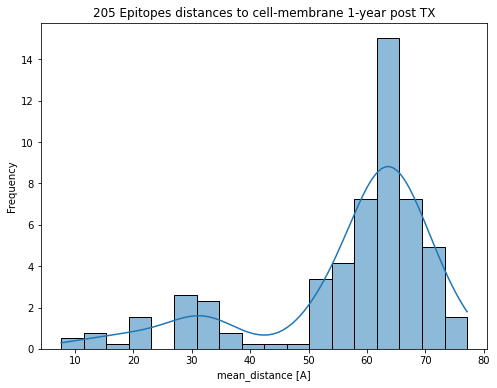

In [10]:
fig, ax = plt.subplots(figsize=(8,6))

E, T = 'FailureCode10Y_R', 'GraftSurvival10Y_R'
ind = df[T] < 1
ind_desa = df['#DESA'] >= 1
df_f = df[ind & ind_desa]
desa_failed_1_year = set([eptiope for epitope_set in df_f[df_f[E] == 1]['DESA'] for eptiope in epitope_set])
ind_ep = eptiopes['Epitope'].apply(lambda x: x in desa_failed_1_year)
sns.histplot(eptiopes[ind_ep]['mean_distance [A]'], kde=True, stat='frequency', ax=ax)
ax.set_title(f'{len(eptiopes[ind_ep])} Epitopes distances to cell-membrane 1-year post TX');
print(f'Number of Transplants getting failled within 1-year after transplantation: {len(df_f)}')
print(f'{dict(df_f[E].value_counts())} -> 1 is Failed Tx, 0 is censored Tx')
print(f'Number of Eplets in these Tx {len(desa_failed_1_year)}')
# fig.savefig('A.pdf')

##  Distribution of Distance2Membrane for Tx failed within 10-year 

Number of Transplants getting failled within 10-year after transplantation: 240
{1: 157, 0: 83} -> 1 is Failed Tx, 0 is censored Tx
Number of Eplets in these Tx 275


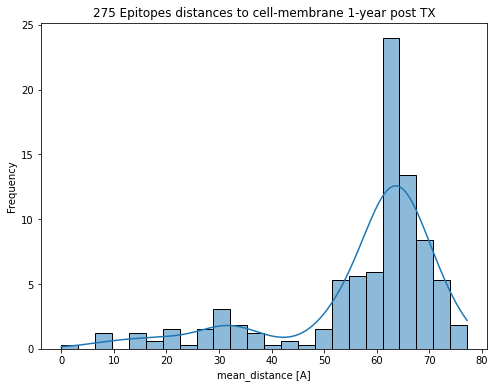

In [15]:
fig, ax = plt.subplots(figsize=(8,6))

E, T = 'FailureCode10Y_R', 'GraftSurvival10Y_R'
ind = df[T] < 10
ind_desa = df['#DESA'] >= 1
df_f = df[ind & ind_desa]
desa_failed_10_year = set([eptiope for epitope_set in df_f[df_f[E] == 1]['DESA'] for eptiope in epitope_set])

ind_ep = eptiopes['Epitope'].apply(lambda x: x in desa_failed_10_year)
sns.histplot(eptiopes[ind_ep]['mean_distance [A]'], kde=True, stat='frequency', ax=ax)
ax.set_title(f'{len(eptiopes[ind_ep])} Epitopes distances to cell-membrane 1-year post TX');

print(f'Number of Transplants getting failled within 10-year after transplantation: {len(df_f)}')
print(f'{dict(df_f[E].value_counts())} -> 1 is Failed Tx, 0 is censored Tx')
print(f'Number of Eplets in these Tx {len(desa_failed_10_year)}')

##  Distribution of Distance2Membrane for Tx never failed 

Number of Transplants never failing after transplantation: 282
{0: 282} -> 1 is Failed Tx, 0 is censored Tx
Number of Eplets in these Tx 286


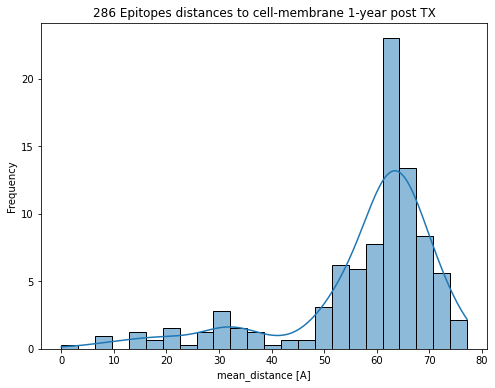

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
E, T = 'FailureCode10Y_R', 'GraftSurvival10Y_R'
df_f = df[(df['#DESA'] >= 1) & (df[E] == 0)]
desa_neverfailed = set([eptiope for epitope_set in df_f['DESA'] for eptiope in epitope_set])
ind_ep = eptiopes['Epitope'].apply(lambda x: x in desa_neverfailed)
sns.histplot(eptiopes[ind_ep]['mean_distance [A]'], kde=True, stat='frequency', ax=ax)
ax.set_title(f'{len(eptiopes[ind_ep])} Epitopes distances to cell-membrane 1-year post TX');
print(f'Number of Transplants never failing after transplantation: {len(df_f)}')
print(f'{dict(df_f[E].value_counts())} -> 1 is Failed Tx, 0 is censored Tx')
print(f'Number of Eplets in these Tx {len(desa_neverfailed)}')
# fig.savefig('A.pdf')

## Whole Epitope database distribution

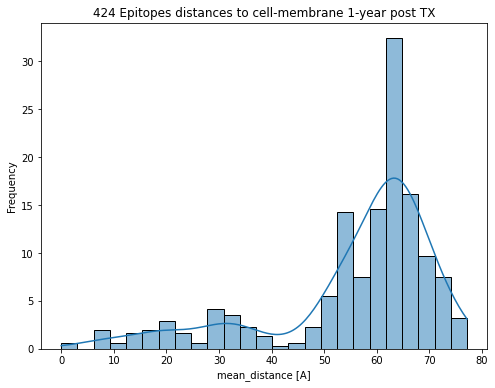

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(eptiopes['mean_distance [A]'], kde=True, stat='frequency', ax=ax)
ax.set_title(f'{len(eptiopes)} Epitopes distances to cell-membrane 1-year post TX');

In [10]:
fig.savefig('B.pdf')

# Epitope Distances based on Elli-Pro Score

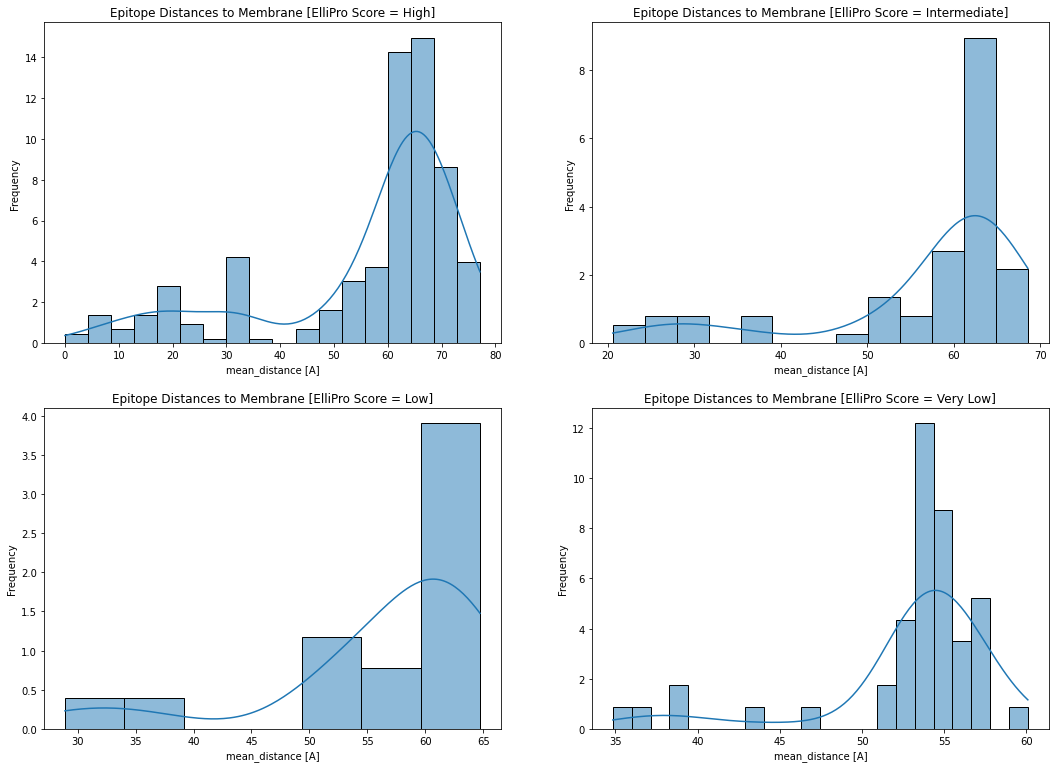

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(18,13))
ind = eptiopes['ElliPro Score'] == 'High'
sns.histplot(eptiopes[ind]['mean_distance [A]'], kde=True, stat='frequency', ax=ax[0,0]);
ax[0,0].set_title('Epitope Distances to Membrane [ElliPro Score = High]');

ind = eptiopes['ElliPro Score'] == 'Intermediate'
sns.histplot(eptiopes[ind]['mean_distance [A]'], kde=True, stat='frequency', ax=ax[0,1]);
ax[0,1].set_title('Epitope Distances to Membrane [ElliPro Score = Intermediate]');

ind = eptiopes['ElliPro Score'] == 'Low'
sns.histplot(eptiopes[ind]['mean_distance [A]'], kde=True, stat='frequency', ax=ax[1,0]);
ax[1,0].set_title('Epitope Distances to Membrane [ElliPro Score = Low]');

ind = eptiopes['ElliPro Score'] == 'Very Low'
sns.histplot(eptiopes[ind]['mean_distance [A]'], kde=True, stat='frequency', ax=ax[1,1]);
ax[1,1].set_title('Epitope Distances to Membrane [ElliPro Score = Very Low]');
fig.savefig('overview.pdf')

In [10]:
eptiopes.shape

(424, 12)